In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [ ]:
#Datasetet heter Student Performance Dataset och kommer från Kaggle 
#(eller UCI Machine Learning Repository). Det handlar om hur studenter presterar i olika skolämnen.

#Det finns info om elevernas bakgrund och deras resultat i matematik, läsning och skrivning.

In [3]:
df = pd.read_csv("study_performance.csv")

In [ ]:
#Följande kategoriska variabler finns:

#gender: man eller kvinna

#race_ethnicity: fem olika grupper (A–E)

#parental_level_of_education: utbildningsnivå hos föräldrar (t.ex. "bachelor's degree", "some college")

#lunch: typ av lunchprogram (standard eller gratis/reducerat)

#test_preparation_course: om studenten genomgått en förberedande kurs eller inte

In [4]:
# Grundläggande info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

In [ ]:
#Kolumnerna math_score, reading_score och writing_score har typen int64.
  #  Det betyder att värdena är heltal (inte decimaltal) och kan vara ganska stora.
#Eftersom de är heltal kan vi göra räkningar, jämförelser och statistiska beräkningar på dem

In [ ]:
#Målet med projektet är att förutsäga studenters skrivpoäng (writing_score) baserat på
#deras bakgrundsvariabler och prestationer i andra ämnen.

#Datasetet är intressant eftersom studenternas resultat påverkas av flera faktorer som socioekonomi, 
#föräldrars utbildningsnivå och om de gått en testförberedande kurs.

#Projektet visar hur man kan använda maskininlärning för regressionsmodellering 
#och hur man bygger ett API för att göra prediktioner baserat på modellen.


In [ ]:
#Visualiseringar:

In [6]:
import matplotlib.pyplot as plt


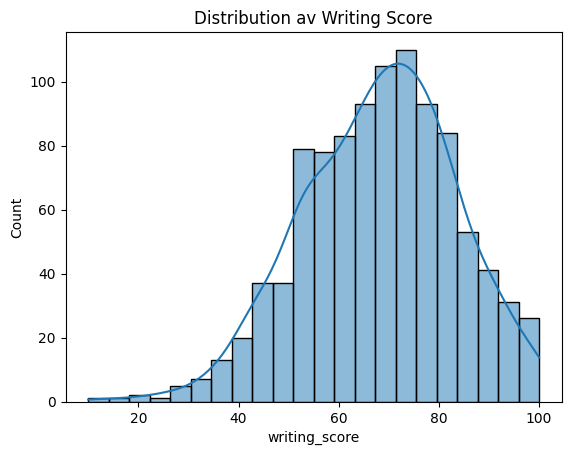

In [7]:
# Histogram Writing Score
sns.histplot(df['writing_score'], kde=True).set_title("Distribution av Writing Score")
plt.show()

In [ ]:
#Histogrammet visar hur writing_score är fördelade bland studenterna.
#KDE-kurvan ovanpå visar den sannolika fördelningen av poängen, alltså hur resultaten är spridda.

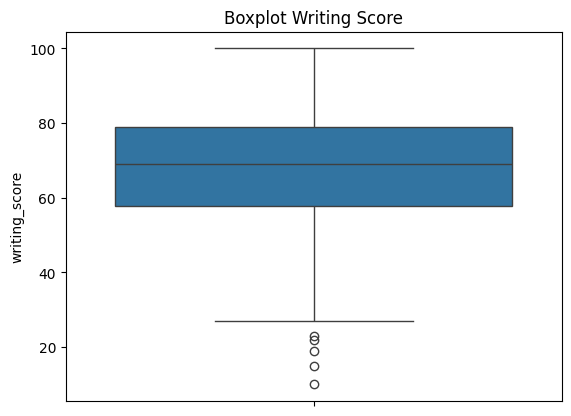

In [8]:
# Boxplot Writing Score
sns.boxplot(y=df['writing_score']).set_title("Boxplot Writing Score")
plt.show()

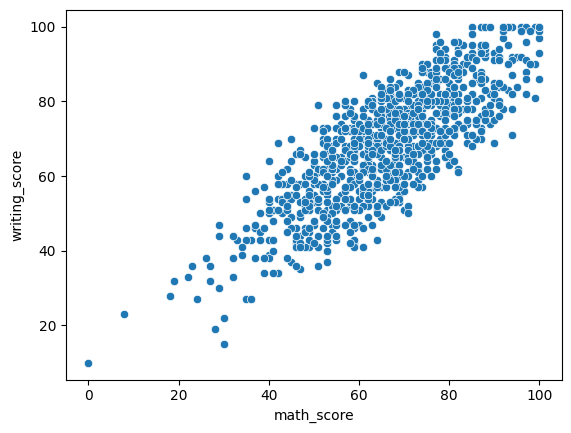

In [9]:
# Scatterplot Math vs Writing
sns.scatterplot(x='math_score', y='writing_score', data=df)
plt.show()


In [ ]:
#Boxploten visar fördelningen av writing_score med median, kvartiler och eventuella outliers.


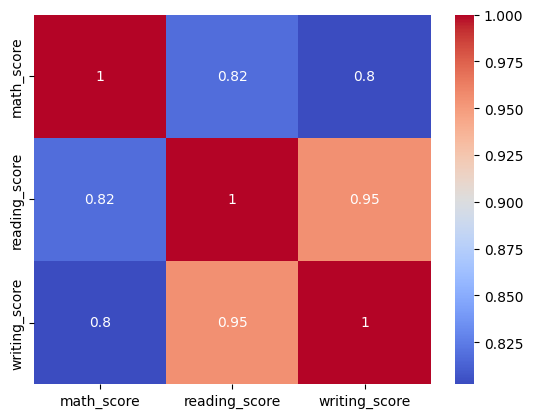

In [10]:
# Korrelation mellan poängen
sns.heatmap(df[['math_score','reading_score','writing_score']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Jag valde variablerna math_score och reading_score som features eftersom 
#de båda representerar studenternas prestationer i liknande akademiska områden 
#och har en stark korrelation med writing_score. Elever som presterar bra i matematik och
#läsning tenderar ofta att skriva bättre också.

#Syftet med projektet är att förutsäga studenters skrivpoäng (writing_score) 
#baserat på deras resultat i matematik och läsning samt andra bakgrundsvariabler. 
   # Modellen ska alltså lära sig sambandet mellan math_score, reading_score och writing_score,
#där writing_score är målvariabeln (target) och de andra fungerar som förklarande variabler (features).

#Heatmapen visar korrelationen mellan math_score, reading_score och writing_score. 
#    Värden nära 1 eller -1 visar stark positiv eller negativ linjär relation.
     #   Här ser man tydligt hur starkt poängen hänger ihop, 
#vilket hjälper oss att förstå vilka variabler som är mest informativa för att förutsäga writing_score.

In [11]:
#Datapreparation
# Features och target
X = df.drop('writing_score', axis=1)
y = df['writing_score']

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#Fas 3: Modellträning och Utvärdering
# Identifiera kategoriska kolumner
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

# One-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dela upp i train och test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Skala numeriska features om du vill
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Träna modellen
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Spara modellen
import joblib
joblib.dump(model, "writing_score_model.joblib")
joblib.dump(scaler, "writing_score_scaler.joblib")
joblib.dump(X_encoded.columns.tolist(), "feature_columns.joblib")



['feature_columns.joblib']

In [ ]:
#jag identifierar kategoriska kolumner (gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course) och omvandlar dem till numeriska med one-hot encoding.

#Datasetet delas upp i tränings- och testset (80/20) för att kunna utvärdera modellen på ny data.

#Numeriska features (math_score, reading_score) standardiseras med StandardScaler för att ge alla variabler samma vikt.

#En linjär regressionsmodell (LinearRegression) tränas på träningsdata för att förutsäga writing_score.

#Modellen, skalaren och kolumnlistan sparas med joblib så att de kan användas i API:t för prediktioner på nya data.

In [14]:
joblib.dump(model, "writing_score_model.joblib")


['writing_score_model.joblib']

In [15]:
import joblib

# Antag att  tränade modell heter 'model'
joblib.dump(model, "writing_score_model.joblib")

# Om  använder en scaler
joblib.dump(scaler, "writing_score_scaler.joblib")


['writing_score_scaler.joblib']

In [16]:
import joblib


joblib.dump(model, "writing_score_model.joblib")
print("Modellen sparad som writing_score_model.joblib")


Modellen sparad som writing_score_model.joblib


In [17]:
import joblib
print(joblib.load("feature_columns.joblib"))


['math_score', 'reading_score', 'gender_female', 'gender_male', 'race_ethnicity_group A', 'race_ethnicity_group B', 'race_ethnicity_group C', 'race_ethnicity_group D', 'race_ethnicity_group E', "parental_level_of_education_associate's degree", "parental_level_of_education_bachelor's degree", 'parental_level_of_education_high school', "parental_level_of_education_master's degree", 'parental_level_of_education_some college', 'parental_level_of_education_some high school', 'lunch_free/reduced', 'lunch_standard', 'test_preparation_course_completed', 'test_preparation_course_none']


In [18]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib

# Läs in data
df = pd.read_csv('study_performance.csv')

# Definiera features och target
X = df.drop('writing_score', axis=1)
y = df['writing_score']

# Identifiera kategoriska kolumner
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

#One-hot encoding av kategoriska variabler
X_encoded = pd.get_dummies(X, columns=categorical_cols)

#Dela upp data i train och test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#Skala numeriska kolumner (math_score, reading_score)
scaler = StandardScaler()
numerical_cols = ['math_score', 'reading_score']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

#Linear Regression-modellen
model = LinearRegression()
model.fit(X_train, y_train)

# Spara modellen, scaler och feature-kolumner
joblib.dump(model, 'writing_score_model.joblib')
joblib.dump(scaler, 'writing_score_scaler.joblib')
joblib.dump(X_encoded.columns.tolist(), 'feature_columns.joblib')

print("Modell, scaler och feature-kolumner sparade!")


Modell, scaler och feature-kolumner sparade!
